In [1]:
%load_ext autoreload
%autoreload 2
# https://ipython.readthedocs.io/en/stable/config/extensions/autoreload.html
# auto reload local module

In [2]:
CENTROIDS_DICT={
    '50': (191.08, 36.76),
    '75': (157.70, 139.18),
    '100': (150.82, 61.53),
    '200': (153.42, 109.96),
}

In [3]:
from myscript.report_processor.solver_processor import SolverProcessor
from myscript.report_processor.solver_processor import get_solver_mat, plot_solver_matrix
import os
import matplotlib.pyplot as plt
from myscript.fit.solver import *

test_dir = 'local/isowall4'

mat = get_solver_mat(os.path.join(test_dir, "Cells_2400.txt"), flatten=1)
# x = np.absolute(np.arange(mat.shape[0]) - CENTROIDS_DICT['200'][1])
x = np.arange(mat.shape[0]) # source from bottom wall
y = get_solver_mat(os.path.join(test_dir, "Cells_2400.txt"), flatten=1)

In [4]:
popt = fit_exp(x, y)
print("C0={:.4f}  Lambda={:.4f} b={:.4f}".format(popt[0], 1 / popt[1], popt[2]))


C0=1.3026  Lambda=25.3096 b=-0.0021


In [5]:
from myscript.fit.solver import shh_read_out_analytic_sol
p, d, Lf, Lt, k = 1, 0.005, 100, 1000, popt[1]
print(f"Production: {p}")
print(f"Degradation: {d}")
print(f"Lf: {Lf}")
print(f"Lt: {Lt}")
print(f"Lambda: {1/k}")

Production: 1
Degradation: 0.005
Lf: 100
Lt: 1000
Lambda: 25.309568979803768


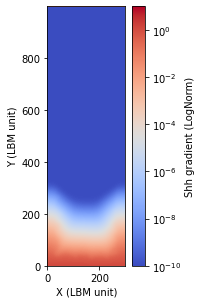

In [6]:
plot_solver_matrix(os.path.join(test_dir, "Cells_2400.npy"), shift=1e-10, vmin=1e-10, vmax=10)

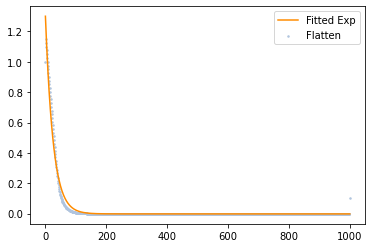

In [7]:
fig, ax = plt.subplots()
ax.scatter(x, y, label='Flatten', s=2.4, alpha=0.9, c="lightsteelblue")
y_fit = model_func(x, popt[0], popt[1], popt[2])
ax.plot(x, y_fit, label='Fitted Exp', c="darkorange")
ax.legend(loc="best")
fig.savefig('simple_influx.pdf', dpi=300)

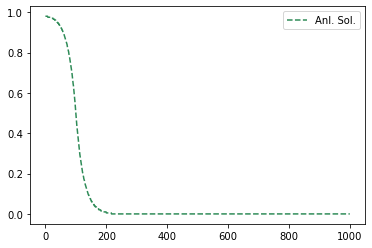

In [8]:
fig, ax = plt.subplots()
y_anl = shh_read_out_analytic_sol(x, p, d, Lf, Lt, k) * d / p
ax.plot(x, y_anl, label='Anl. Sol.', c="seagreen", linestyle="--")
ax.legend(loc="best")
fig.savefig('anl_sol_only.pdf', dpi=300)